In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Monte-Carlo Integration

Here, we want to use Monte-Carlo integration techniques in order to try and determine the mean of a power-law distribution with $\alpha\le2$.

Recall that a power-law relation is given by $p(x)=Cx^{-\alpha}$. In order to find the mean of this distribution, we can calculate the first moment,$$\langle x\rangle=\int_{x_{min}}^{x_{max}}\mathrm{d}x~xp(x).$$This seems simple enough. However, upon computing the integral, we find that $$\langle x\rangle = \frac{C}{2-\alpha}x^{2-\alpha}\Big\rvert_{x_{min}}^{x_{max}}.$$Notice that for $\alpha=2$, $\langle x\rangle\to\infty$ and that for $\alpha<2$, $\langle x\rangle<0$. Additionally, if we push $x_{max}\to\infty$, we will notice that our integral will diverge for all $\alpha<2$. So what can we do?

Here, we will try to use a Monte-Carlo approach to evaluate the integral for **finite** $x_{max}$ such that $\langle x\rangle$ can be calculated.

Consider the integral, $$I=\int_a^b\mathrm{d}x~f(x).$$In our case, $f(x)=xp(x)=Cx^{-\alpha+1}$. We can write this integral in terms of its average as $$I=\int_a^b\mathrm{d}x~f(x)=(b-a)\langle f\rangle$$where $\langle f\rangle\approx\frac{1}{N}\sum_{i=1}^{N}f(x_i)$. Thus, by using a large number of points $N$, we can compute the integral to a reasonable degree of accuracy.

First, let's do a test case. If $f(x)=x^2$ and $a=-1,b=1$, we know that $I=\frac{2}{3}$. Let's compute this integral using an MC method to test how well it compares to the actual answer.

In [2]:
def test_func(x,**kwargs):
    return x**2

In [3]:
def monte_carlo_integrator(N,f,**kwargs):
    #generate points in the given range
    np.random.seed()
    points = (kwargs['b'] - kwargs['a'])*np.random.rand(N) + kwargs['a']
    
    #calculate the average
    f_sum = 0.0
    for p in points:
        f_sum = f_sum + f(p,**kwargs)
    f_mean = f_sum/N
    
    #return total answer
    return (kwargs['b'] - kwargs['a'])*f_mean

In [4]:
a = -1
b = +1
N = 100
print "Monte-Carlo Integration of x^2 on [%d,%d] for N=%d is %.4f"%(a,b,N,monte_carlo_integrator(N,test_func,a=a,b=b))

Monte-Carlo Integration of x^2 on [-1,1] for N=100 is 0.7020


That's reasonably close ($\frac{2}{3}\approx0.667$) but increasing $N$ will improve our estimate. 

In [5]:
mc_test = []
N = np.linspace(100,100000,100)
for n in N:
    mc_test.append(monte_carlo_integrator(n,test_func,a=a,b=b))

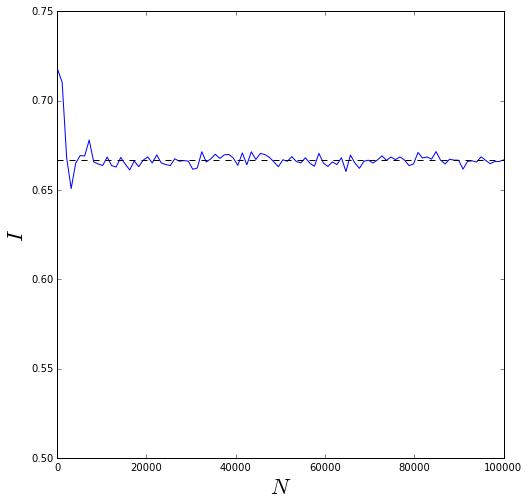

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(N,mc_test)
ax.axhline(y=2.0/3.0,color='black',linestyle='--')
ax.set_xlabel(r'$N$',fontsize=22)
ax.set_ylabel(r'$I$',fontsize=22)
ax.set_ylim(0.5,0.75)
plt.show()

Now that we've tried it out on a test case, let's try it out on our mean function for $\alpha\le2$.

In [7]:
def pl_mean(x,**kwargs):
    #define coefficient
    C = (1.0 - kwargs['alpha'])/(kwargs['b']**(1.0-kwargs['alpha']) - kwargs['a']**(1.0-kwargs['alpha']))
    #define power-law function
    f = C*x**(-kwargs['alpha'])
    #return the mean integrand
    return x*f

In [8]:
N = np.logspace(3,6,100)
for i in range(len(N)):
    N[i] = int(N[i])
a = 0.05
b = 0.5
alpha = 2.0
mc_test_alpha2 = []
for n in N:
    mc_test_alpha2.append(monte_carlo_integrator(n,pl_mean,a=a,b=b,alpha=alpha))

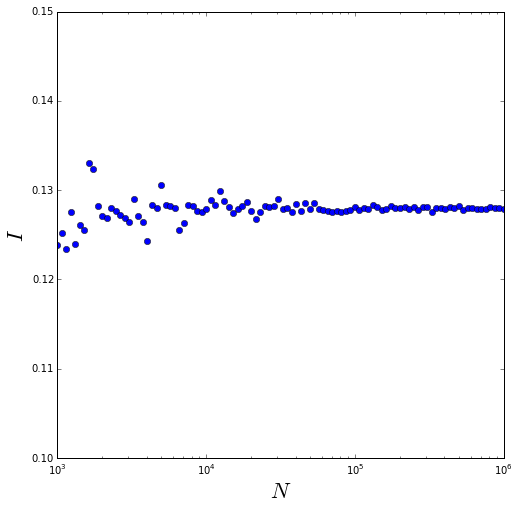

In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(N,mc_test_alpha2,'bo')
ax.set_xlabel(r'$N$',fontsize=22)
ax.set_ylabel(r'$I$',fontsize=22)
ax.set_xscale('log')
ax.set_ylim(0.1,0.15)
plt.show()

Similarly, we can try this out for $\alpha=1.5$.

In [10]:
alpha = 1.5
N = np.logspace(3,6,100)
for i in range(len(N)):
    N[i] = int(N[i])
mc_test_alpha15 = []
for n in N:
    mc_test_alpha15.append(monte_carlo_integrator(n,pl_mean,a=a,b=b,alpha=alpha))

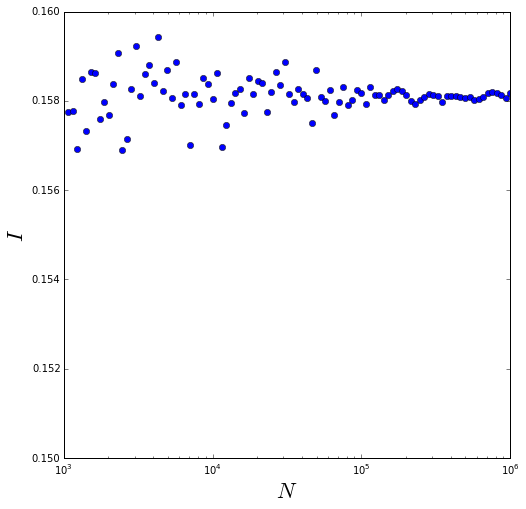

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(N,mc_test_alpha15,'bo')
ax.set_xlabel(r'$N$',fontsize=22)
ax.set_ylabel(r'$I$',fontsize=22)
ax.set_xscale('log')
ax.set_ylim(0.15,0.16)
plt.show()

It seems that we are indeed converging on a single value, but is it the right value? To check this, we can compute some actual values from power-law distributions with these given indices and check to see what the resulting mean values are.

In [12]:
def pl_dist(a0,a1,alpha,x):
        return ((a1**(alpha+1) - a0**(alpha+1))*x + a0**(alpha+1))**(1/(alpha+1))

In [13]:
num_samples = 1.0e+6
dist2 = pl_dist(a,b,-2.0,np.random.rand(num_samples))
dist15 = pl_dist(a,b,-1.5,np.random.rand(num_samples))

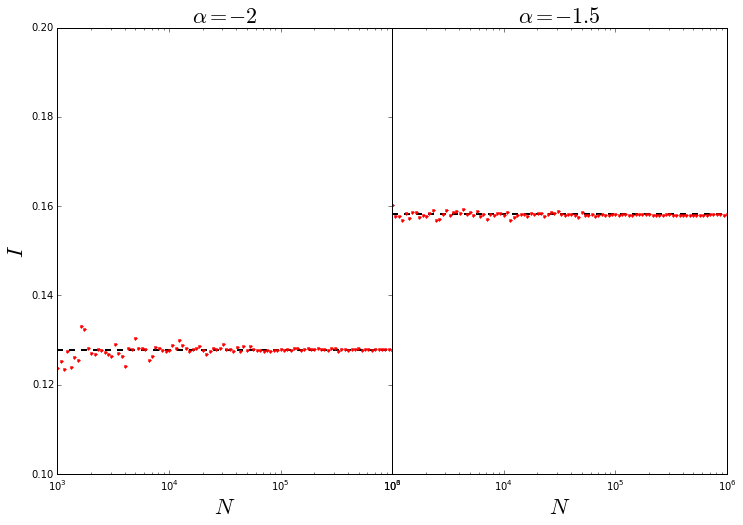

In [14]:
fig,ax = plt.subplots(1,2,figsize=(12,8))
plt.subplots_adjust(wspace=0)
ax[0].axhline(y=np.mean(dist2),color='k',linestyle='--',linewidth=2)
ax[0].plot(N,mc_test_alpha2,'r.')
ax[0].set_xlabel(r'$N$',fontsize=22)
ax[0].set_ylabel(r'$I$',fontsize=22)
ax[0].set_xscale('log')
ax[0].set_ylim(0.1,0.2)
ax[0].set_title(r'$\alpha=-2$',fontsize=22)
ax[1].axhline(y=np.mean(dist15),color='k',linestyle='--',linewidth=2)
ax[1].plot(N,mc_test_alpha15,'r.')
ax[1].set_xlabel(r'$N$',fontsize=22)
ax[1].set_xscale('log')
ax[1].set_ylim(0.1,0.2)
ax[1].set_yticks([])
ax[1].set_title(r'$\alpha=-1.5$',fontsize=22)

Thus, we can see that, given an adequate number of samples, we can converge to approximately the correct value of the mean for $\alpha\le2$.

##Estimating Range from Mean

We need to find a way to estimate the range of the distribution, $Q_{\mathrm{min}},Q_{\mathrm{max}}$, such that our time-averaged heating rate is approximately $H_n$. We can calculate the mean from the first moment of the distribution but this expression is useless for $\alpha\le2$. Instead, let's just try to estimate it using the simple formula $$\langle Q\rangle\sim(Q_{\mathrm{max}}-Q_{\mathrm{min}})/N$$and let $Q_{\mathrm{min}},Q_{\mathrm{max}}$ be separated such that $Q_{\mathrm{max}}=\delta Q_{\mathrm{min}}$ where $\delta\ge10$. Combining these expressions then $$\langle Q\rangle\sim Q_{\mathrm{min}}(\delta-1)/N.$$Provided we can calculate $\langle Q\rangle$, we can find $Q_{\mathrm{min}}$. 

Let's try an example using our method used above for $\alpha=-1.5$ and $\delta=10$. We will use $Q_{\mathrm{min}}=10^{23}$ and then calculate this from the mean to see how well our approximation does.

In [68]:
q0 = 1.0e+23
delta = 10.0
q1 = delta*q0
alpha = -1.5
t_wait = np.arange(250,5250,250)
qmean = monte_carlo_integrator(1.0e+6,pl_mean,b=q1,a=q0,alpha=alpha)

In [69]:
def time_averaged_heating_rate(L,tpeak):
    kappa = 1.0e-6
    return kappa*tpeak**(3.5)/L**2
def qmin(qmean,delta):
    return qmean*2.0/(delta-1.0) 
print qmin(qmean,delta)

1.59546194297e+23


Now, let's look at the required $Q_{\mathrm{min}}$ values for a range of $\langle Q\rangle$ values as specified by $T_N$.

In [70]:
def qmean_tn(const,t_wait):
    hn = time_averaged_heating_rate(const['L'],const['tpeak'])
    return 2.0*hn*const['L']*const['A']*(const['tau'] + t_wait)

In [71]:
const = {'L':120.0e+8}
const['A'] = 1.0e+14
const['tau'] = 100.0
const['tpeak'] = 4.0e+6

In [72]:
q_average = []
q_minimum = []
q_maximum = []
for tw in t_wait:
    q_average.append(qmean_tn(const,tw))
    q_minimum.append(qmin(qmean_tn(const,tw),delta))
    q_maximum.append(qmin(qmean_tn(const,tw),delta)*delta)

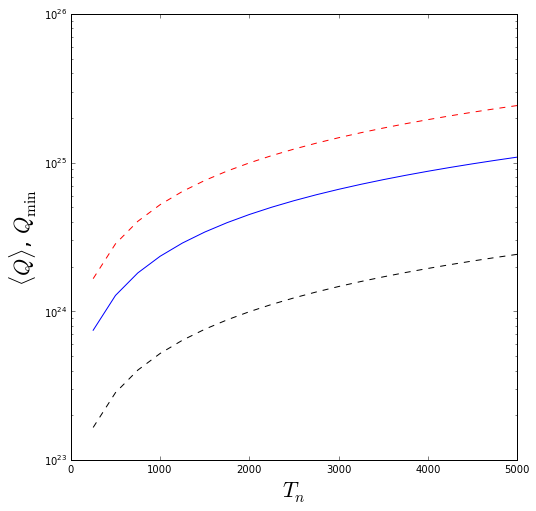

In [73]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(t_wait,q_average)
ax.plot(t_wait,q_minimum,'k--')
ax.plot(t_wait,q_maximum,'r--')
ax.set_xlabel(r'$T_n$',fontsize=22)
ax.set_ylabel(r'$\langle Q\rangle$, $Q_{\mathrm{min}}$',fontsize=22)
ax.set_yscale('log')
plt.show()